In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [25]:
#read in data
df = pd.read_excel("US life at war.xlsx")

df["perc"] = (df["% of your life the US has been at war"]*100).astype(int)

war_dict = {1914: "World War 1",1915: "World War 1",1916: "World War 1",1917: "World War 1", 1918: "World War 1",
           1939: "World War 2", 1940: "World War 2", 1941: "World War 2", 1942: "World War 2", 1943: "World War 2",
           1944: "World War 2",1945: "World War 2", 
            1950: "Korean War", 1951: "Korean War", 1952: "Korean War", 1953: "Korean War",
           1955: "Vietnam War", 1956:"Vietnam War", 1957: "Vietnam War", 1958: "Vietnam War", 1959:"Vietnam War", 
          1960: "Vietnam War",1961: "Vietnam War",1962: "Vietnam War",1963: "Vietnam War",1964: "Vietnam War",
           1965: "Vietnam War",1966: "Vietnam War",1967: "Vietnam War",1968: "Vietnam War",1969: "Vietnam War",
           1970: "Vietnam War",1971: "Vietnam War",1972: "Vietnam War",1973: "Vietnam War",1974: "Vietnam War",
           1973: "Vietnam War", 
           1990: "Gulf War", 1991: "Gulf War",
           2001: "Afghanistan War",2002: "Afghanistan War",2003: "Afghanistan War",2004: "Afghanistan War",
           2005: "Afghanistan War",2006: "Afghanistan War",2007: "Afghanistan War",2008: "Afghanistan War",
            2009: "Afghanistan War", 2010: "Afghanistan War",2011: "Afghanistan War",2012: "Afghanistan War",
           2013: "Afghanistan War",2014: "Afghanistan War",2015: "Afghanistan War",2016: "Afghanistan War",
           2017: "Afghanistan War",2018: "Afghanistan War",2019: "Afghanistan War",2020: "Afghanistan War"}

In [47]:
df["War name"] = df["Birth year"].map(war_dict)
df["War name"] = df["War name"].fillna("No war")
df["War"] = ["No war" if x=="No war" else "War" for x in df["War name"]]

Text(0, 0.92, 'How much of your life has the US been at war by year of birth (%)')

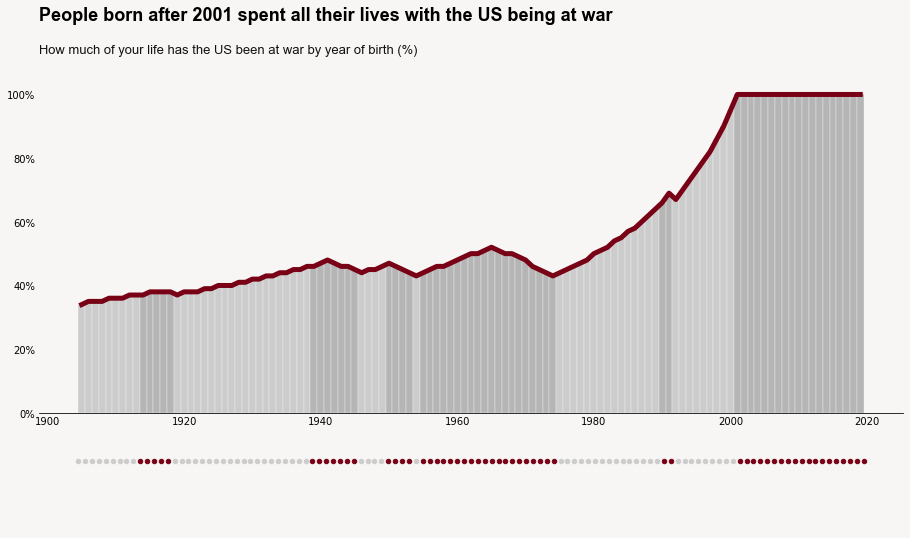

In [135]:
# =========
# Initialise Figure and define layout
fig, ax = plt.subplots(figsize=(12,9))
fig.set_facecolor("#f7f6f4")

colors = {"War": "#780116", "No war": "#cccccc"}
bar_colors = {"War": "#b5b5b5", "No war": "#cccccc"}

#make plot area transparent
plt.subplots_adjust(left=0, bottom=0, right=1, top=0.88, wspace=None, hspace=None)



# ====== first plot
plt.subplot2grid(shape=(5,1), loc=(0,0), rowspan=3)

for i in range(len(df)):
    plt.bar(df["Birth year"][i], df["perc"][i], color=bar_colors[df["War"][i]], width=1, zorder=2,
           edgecolor='white', linewidth=0.3)

plt.plot(df["Birth year"],df["perc"], linewidth=5, color = colors["War"], zorder=3)
    
#remove grid
for pos in ['right', 'top',  'left']:
    plt.gca().spines[pos].set_visible(False)

plt.gca().patch.set_alpha(0)     

#yaxis
plt.tick_params(axis='both', length = 0, color = "#444444")
plt.tick_params(axis='y', labelsize=10)
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: '{:,.0f}%'.format(x)))


#==============
#scatter
plt.subplot(5,1,4)

#for i in range(len)
for i in range(len(df)):
    plt.scatter(df["Birth year"][i],1,s=20, color=colors[df["War"][i]])

    
#remove grid
for pos in ['right', 'top',  'left', 'bottom']:
    plt.gca().spines[pos].set_visible(False)

#y-axis
plt.gca().set_ylim(ymin=0.5, ymax=1.2)
plt.gca().get_yaxis().set_visible(False)
plt.gca().get_xaxis().set_visible(False)

#make transparent
plt.gca().patch.set_alpha(0)  

# Add annotations


# ============
# Add title
plt.figtext(0,0.97,'People born after 2001 spent all their lives with the US being at war',
         fontsize = 18, weight = 'bold', fontfamily='Arial', color='black')
plt.figtext(0,0.92, "How much of your life has the US been at war by year of birth (%)", 
            fontsize=13, ha='left',  color="#111111", fontfamily="Arial")


